# get_year_structure_built() demo

A quick demonstration of the get_year_structure_built() function from the ACS_data_retriever library. The function is used to gather the age of housing structures in Massachusetts over the 15 year period covered by the American Communities Survey and then displays the change in percentage of each group over time. 

We start by importing the necessary packages

In [1]:
# Get the root directory of the project (assumes the notebook is in /notebooks)
import os
import sys
project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# import other packages 
from ACS_retriever import get_year_structure_built
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

The data is then gathered. To get data for Massachusetts, we use the MA ucgid code (0400000US25) and index each year's data for that code in the loop. We end by checking the resulting dataframe to make sure we gathered all the correct data. 

In [3]:
# set code for Massachusetts 
MAcode = '0400000US25'

# initialize DataFrame 
MA_data = pd.DataFrame()

# iterate through all years of the ACS and gather data for MA
for year in np.arange(2009,2024):

    # make API call for single year data 
    year_data = get_year_structure_built(str(year),'state',as_percent=True)
    
    # extract row for Massachusetts 
    year_MA_data = year_data[year_data['ucgid'] == MAcode].copy()
    
    # add value for year 
    year_MA_data['Year'] = year

    # concatenate to MA DataFrame 
    MA_data = pd.concat([MA_data,year_MA_data],ignore_index = True)

# check dataframe 
MA_data.head()

,ucgid,Built 2005 or later,Built 2000 to 2004,Built 1990 to 1999,Built 1980 to 1989,Built 1970 to 1979,Built 1960 to 1969,Built 1950 to 1959,Built 1940 to 1949,Built 1939 or earlier,Year,Built 2010 or later,Built 2000 to 2009,Built 2014 or later,Built 2010 to 2013,Built 2020 or later,Built 2010 to 2019
0,0400000US25,1.4,3.9,7.5,11.0,11.8,10.5,11.5,6.2,36.2,2009,NaN,NaN,NaN,NaN,NaN,NaN
1,0400000US25,2.0,4.1,7.4,10.9,11.8,10.5,11.4,6.1,35.8,2010,NaN,NaN,NaN,NaN,NaN,NaN
2,0400000US25,2.6,4.1,7.3,10.8,11.7,10.4,11.5,6.1,35.4,2011,NaN,NaN,NaN,NaN,NaN,NaN
3,0400000US25,NaN,NaN,7.3,10.8,11.8,10.4,11.6,6.0,35.0,2012,0.2,7.0,NaN,NaN,NaN,NaN
4,0400000US25,NaN,NaN,7.3,10.8,11.7,10.4,11.6,5.9,34.6,2013,0.3,7.3,NaN,NaN,NaN,NaN


Lastly, to visualize the change in each group, we normalize the values to the first year (2009) and then plot the change over time. 

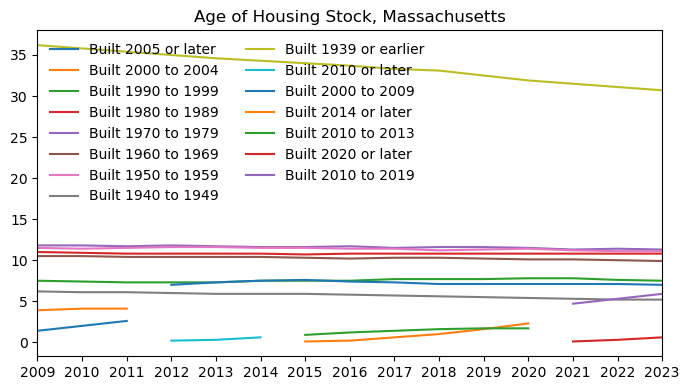

In [5]:
# plot change over time  

# get subset of columns for plotting 
MA_subset = MA_data.drop(columns=['ucgid','Year'])

# normalize to 2009 data 
# MA_subset = MA_subset.div(MA_subset.iloc[0])

# set figure size 
plt.figure(figsize=(7,4))

# plot each marital status 
for col in MA_subset.columns:
    plt.plot(MA_data['Year'],MA_subset[col], label=col)

# display legend 
plt.legend(frameon=0,ncol=2,loc='upper left')

# title plot 
plt.title('Age of Housing Stock, Massachusetts')

# label each x tick with the year 
plt.xlim([2009,2023])
plt.xticks(np.arange(2009,2024))

# display plot 
plt.tight_layout()
plt.show()